In [1]:
import nltk
import os
import re
import pandas as pd
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [2]:
# Read the dataset
data=pd.read_csv("gujarati-train.csv")
data.head()

,headline,Label
0,IPL Auction 2022: 12-13 ફેબ્રુઆરીએ કેટલા વાગ્ય...,Sports
1,રોહિત-કોહલીના વિવાદ પર ગાવસ્કરે કર્યો મોટો ખુલ...,Sports
2,"પાકિસ્તાની ફાસ્ટ બોલરને કરાયો સસ્પેંડ, 155kphન...",Sports
3,એશિઝમાં કારમી હારને લીધે ગિલ્સ બાદ મુખ્ય કોચને...,Sports
4,ક્યાં રમાશે IPL 2022ના મેચ? સૌરવ ગાંગુલીએ આપ્ય...,Sports


In [4]:
# Data Pre-processing : Removing nos,punctuations and english words

# Remove Punc
data["No_punc"] = data["headline"].str.replace('[^\w\s]','')
data.head()

C:\Users\Cyril\AppData\Local\Temp\ipykernel_2272\3834101439.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["No_punc"] = data["headline"].str.replace('[^\w\s]','')


,headline,Label,No_punc
0,IPL Auction 2022: 12-13 ફેબ્રુઆરીએ કેટલા વાગ્ય...,Sports,IPL Auction 2022 1213 ફબરઆરએ કટલ વગયથ લગશ ખલડઓ...
1,રોહિત-કોહલીના વિવાદ પર ગાવસ્કરે કર્યો મોટો ખુલ...,Sports,રહતકહલન વવદ પર ગવસકર કરય મટ ખલસ આપય ચકવનર નવદન
2,"પાકિસ્તાની ફાસ્ટ બોલરને કરાયો સસ્પેંડ, 155kphન...",Sports,પકસતન ફસટ બલરન કરય સસપડ 155kphન સપડથ કર હત બલગ
3,એશિઝમાં કારમી હારને લીધે ગિલ્સ બાદ મુખ્ય કોચને...,Sports,એશઝમ કરમ હરન લધ ગલસ બદ મખય કચન પણ હક કઢય
4,ક્યાં રમાશે IPL 2022ના મેચ? સૌરવ ગાંગુલીએ આપ્ય...,Sports,કય રમશ IPL 2022ન મચ સરવ ગગલએ આપય આ જવબ


In [6]:
# Remove nos
nos = re.compile(r'[0-9]')
data['No_punc'] = data['No_punc'].str.replace(nos, '')
data.head()

,headline,Label,No_punc
0,IPL Auction 2022: 12-13 ફેબ્રુઆરીએ કેટલા વાગ્ય...,Sports,IPL Auction ફબરઆરએ કટલ વગયથ લગશ ખલડઓન બલ
1,રોહિત-કોહલીના વિવાદ પર ગાવસ્કરે કર્યો મોટો ખુલ...,Sports,રહતકહલન વવદ પર ગવસકર કરય મટ ખલસ આપય ચકવનર નવદન
2,"પાકિસ્તાની ફાસ્ટ બોલરને કરાયો સસ્પેંડ, 155kphન...",Sports,પકસતન ફસટ બલરન કરય સસપડ kphન સપડથ કર હત બલગ
3,એશિઝમાં કારમી હારને લીધે ગિલ્સ બાદ મુખ્ય કોચને...,Sports,એશઝમ કરમ હરન લધ ગલસ બદ મખય કચન પણ હક કઢય
4,ક્યાં રમાશે IPL 2022ના મેચ? સૌરવ ગાંગુલીએ આપ્ય...,Sports,કય રમશ IPL ન મચ સરવ ગગલએ આપય આ જવબ


In [12]:
# Remove Aplhabets

alpha = re.compile(r'[a-zA-Z]')
data['No_punc'] = data['No_punc'].str.replace(alpha, '')
data.head()

,headline,Label,No_punc
0,IPL Auction 2022: 12-13 ફેબ્રુઆરીએ કેટલા વાગ્ય...,Sports,ફબરઆરએ કટલ વગયથ લગશ ખલડઓન બલ
1,રોહિત-કોહલીના વિવાદ પર ગાવસ્કરે કર્યો મોટો ખુલ...,Sports,રહતકહલન વવદ પર ગવસકર કરય મટ ખલસ આપય ચકવનર નવદન
2,"પાકિસ્તાની ફાસ્ટ બોલરને કરાયો સસ્પેંડ, 155kphન...",Sports,પકસતન ફસટ બલરન કરય સસપડ ન સપડથ કર હત બલગ
3,એશિઝમાં કારમી હારને લીધે ગિલ્સ બાદ મુખ્ય કોચને...,Sports,એશઝમ કરમ હરન લધ ગલસ બદ મખય કચન પણ હક કઢય
4,ક્યાં રમાશે IPL 2022ના મેચ? સૌરવ ગાંગુલીએ આપ્ય...,Sports,કય રમશ ન મચ સરવ ગગલએ આપય આ જવબ


In [13]:
# Tokenization

import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

f=data['No_punc']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(f)


# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)


Vocabulary Size: 29361


In [14]:
t = tokenizer.texts_to_sequences(f)
print(t[:5])

[[3131, 272, 5344, 559, 714, 188], [14491, 493, 5, 1454, 9, 2, 109, 64, 337, 329], [294, 1665, 2876, 9, 8716, 6, 5345, 4, 18, 870], [10693, 908, 750, 88, 4207, 51, 672, 2357, 15, 343, 1891], [198, 787, 6, 189, 1084, 2358, 64, 3, 200]]


31
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0  3131   272  5344   559   714   188]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0 14491   493     5
   1454     9     2   109    64   337   329]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0   294  1665  2876
      9  8716     6  5345     4    18   870]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0 10693   908   750    88
   4207    51   672  2357    15   343  1891]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0   198   787
      6   189  1084  2358    64     3   200]]


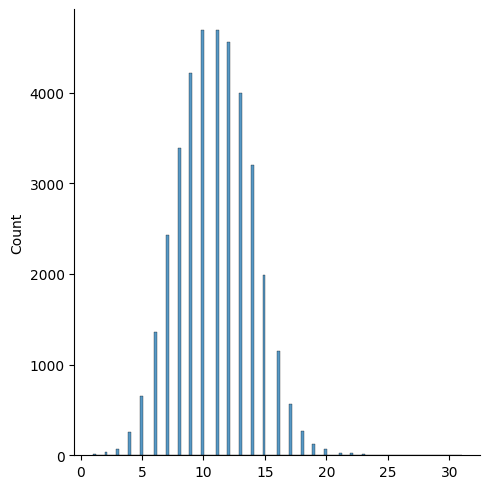

In [15]:
# Padding

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

t_lens = [len(n) for n in t]
t_lens

sns.displot(t_lens)
max_len = t_lens[np.argmax(t_lens)]
print(max_len) #33

t_pad = sequence.pad_sequences(t, maxlen=max_len)
print(t_pad[:5])

In [16]:
#  creating a new dataframe with the Padded sequence
df = pd.DataFrame(t_pad)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3131,272,5344,559,714,188
1,0,0,0,0,0,0,0,0,0,0,...,14491,493,5,1454,9,2,109,64,337,329
2,0,0,0,0,0,0,0,0,0,0,...,294,1665,2876,9,8716,6,5345,4,18,870
3,0,0,0,0,0,0,0,0,0,0,...,908,750,88,4207,51,672,2357,15,343,1891
4,0,0,0,0,0,0,0,0,0,0,...,0,198,787,6,189,1084,2358,64,3,200


In [17]:
# Label Encoding the target values
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data['target'] = labelEncoder.fit_transform(data['Label']) # target variable is label encoded 
data.head()

,headline,Label,No_punc,target
0,IPL Auction 2022: 12-13 ફેબ્રુઆરીએ કેટલા વાગ્ય...,Sports,ફબરઆરએ કટલ વગયથ લગશ ખલડઓન બલ,3
1,રોહિત-કોહલીના વિવાદ પર ગાવસ્કરે કર્યો મોટો ખુલ...,Sports,રહતકહલન વવદ પર ગવસકર કરય મટ ખલસ આપય ચકવનર નવદન,3
2,"પાકિસ્તાની ફાસ્ટ બોલરને કરાયો સસ્પેંડ, 155kphન...",Sports,પકસતન ફસટ બલરન કરય સસપડ ન સપડથ કર હત બલગ,3
3,એશિઝમાં કારમી હારને લીધે ગિલ્સ બાદ મુખ્ય કોચને...,Sports,એશઝમ કરમ હરન લધ ગલસ બદ મખય કચન પણ હક કઢય,3
4,ક્યાં રમાશે IPL 2022ના મેચ? સૌરવ ગાંગુલીએ આપ્ય...,Sports,કય રમશ ન મચ સરવ ગગલએ આપય આ જવબ,3


In [18]:
# Test train split

from sklearn.model_selection import train_test_split
X = df
y = data['target']

X.shape
y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [19]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [22]:
# MLP Model building
import tensorflow as tf

#NUM_CLASSES = 5 [This gives 50.22 accurracy rate]
#model = tf.keras.Sequential([
#    tf.keras.layers.Dense(512, activation='relu'),
#    tf.keras.layers.Dense(256, activation='relu'),
#    tf.keras.layers.Dense(64, ),
#    tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid')
#])

NUM_CLASSES = 5 #49.11%
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, ),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compiling the model with the high-level keras
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Model training
model.fit(trainX_scaled, y_train, epochs=50, batch_size=64)

Epoch 1/50
414/414 [==============================] - 2s 4ms/step - loss: 1.5210 - accuracy: 0.3222
Epoch 2/50
414/414 [==============================] - 2s 4ms/step - loss: 1.4785 - accuracy: 0.3551
Epoch 3/50
414/414 [==============================] - 2s 4ms/step - loss: 1.4253 - accuracy: 0.3900
Epoch 4/50
414/414 [==============================] - 2s 4ms/step - loss: 1.3606 - accuracy: 0.4171
Epoch 5/50
414/414 [==============================] - 2s 4ms/step - loss: 1.3193 - accuracy: 0.4428
Epoch 6/50
414/414 [==============================] - 2s 4ms/step - loss: 1.3393 - accuracy: 0.4531
Epoch 7/50
414/414 [==============================] - 2s 4ms/step - loss: 1.2766 - accuracy: 0.4618
Epoch 8/50
414/414 [==============================] - 2s 4ms/step - loss: 1.2416 - accuracy: 0.4801
Epoch 9/50
414/414 [==============================] - 2s 4ms/step - loss: 1.2157 - accuracy: 0.4937
Epoch 10/50
414/414 [==============================] - 2s 4ms/step - loss: 1.1964 - accuracy: 0.5026

In [23]:
# Evaluation of model
eval_loss, eval_acc = model.evaluate(testX_scaled,  y_test, verbose=1)
print('Eval accuracy percentage: {:.2f}'.format(eval_acc * 100))

355/355 [==============================] - 1s 2ms/step - loss: 1.5043 - accuracy: 0.4911
Eval accuracy percentage: 49.11
